# Asingnment 3

### Image Gradient Calculation (By Hand)

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text{ Position $v_i$ } & \text{ ($I_x$,$I_y$) } & \text{ $||\nabla||$ } & \text{ $\theta_i$ } \\
\hline
\text{$v_1$} & (-255,255) & 360.624 & \text{$\frac{3}{4}\pi$} \\
\text{$v_2$} & (765,255) & 806.380 &0.321 \\
\text{$v_3$} & (-255,-255) & 360.624 & \text{$-\frac{3}{4}\pi$} \\
\text{$v_4$} & (-255,-765) & 806.380 &-1.249 \\
\text{$v_5$} & (-1020,0) & 1020 &0 \\
\text{$v_6$} & (765,-765) & 1081.873 & \text{$-\frac{1}{4}\pi$} \\
\hline
\end{array}
\end{aligned}
$$

In [1]:
using Images, Colors ,Plots
circles =load("circles.png")
filt_x=[1 0 -1;2 0 -2;1 0 -1]
filt_y=[1 2 1;0 0 0;-1 -2 -1]
#heatmap(channelview(float.(imfilter(Gray.(circles), reflect(centered(filt_x))))),color=:grays)

        

3×3 Matrix{Int64}:
  1   2   1
  0   0   0
 -1  -2  -1

In [2]:
#heatmap(channelview(float.(imfilter(Gray.(circles), reflect(centered(filt_y))))),color=:grays)


(368, 370)Base.ReinterpretArray{Float32, 2, Gray{Float32}, Matrix{Gray{Float32}}, true}

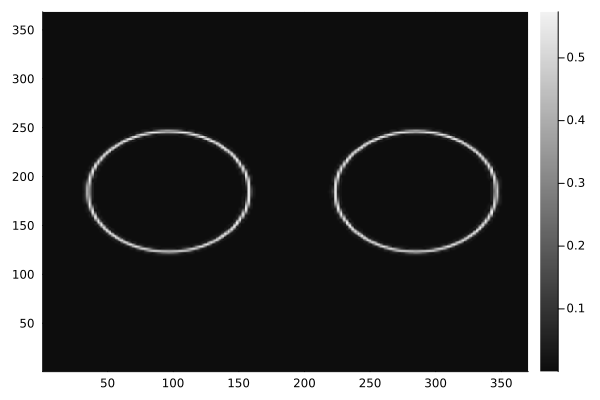

In [3]:
I_x=imfilter(Gray.(circles), reflect(centered(filt_x)))
I_y=imfilter(Gray.(circles), reflect(centered(filt_y)))

#print(typeof(I_x))
I_x = channelview(float.(I_x))
print(size(I_x))
I_y = channelview(float.(I_y))
print(typeof(I_x))

gradient_mag = sqrt.(I_x.^2 + I_y.^2)
gradient_angle = atan.(I_y, I_x) 
heatmap(gradient_mag ,color=:grays)

In [4]:
include("colorgrad.jl")
using .ColorGrad


In [5]:
color_wheel_angles =zeros(100,100)
color_wheel_magnitudes =zeros(100,100)
for i in eachindex(view(color_wheel_angles,1:size(color_wheel_angles,1),1:size(color_wheel_angles,2)))
   
    diff_x=i[2]-50.5
    diff_y=i[1]-50.5
    if (diff_x^2 +diff_y^2)<50^2
        color_wheel_angles[i]=atan(diff_y,diff_x)
        color_wheel_magnitudes[i]=1
    end
end

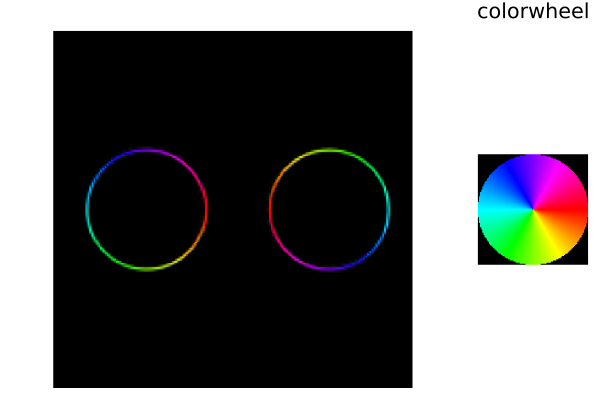

In [6]:
p1=plot(colorgrad(gradient_angle, gradient_mag,0.01),showaxis=false,xticks=false,yticks=false)
p2=plot(colorgrad(color_wheel_angles, color_wheel_magnitudes,0.01),xticks=false,yticks=false,title="colorwheel", showaxis=false,size=(100,100))

plot(p1, p2, layout = grid(1, 2; widths = [0.8,0.2]))        

In [7]:
using FileIO
i=1
y_start=130
y_end=140
x_start=130
x_end=140
v_x=zeros(((y_end-y_start)+1)*((x_end-x_start)+1))
v_y=zeros(((y_end-y_start)+1)*((x_end-x_start)+1))
for y in y_start:y_end
    for x in x_start:x_end
        v_y[i]=y-y_start+1
        v_x[i]=x-x_start+1
        i=i+1
    end
end

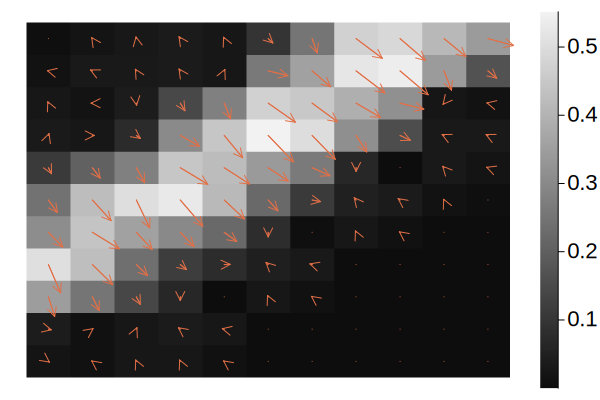

In [8]:
I_mag=gradient_mag[y_start:y_end,x_start:x_end]
I_mask= I_mag.>0.01
I_x_croped = I_x[y_start:y_end,x_start:x_end]
I_x_croped =I_x_croped.*I_mask
I_x_vec=vec(I_x_croped')
I_x_vec =I_x_vec/maximum(I_mag)

I_y_croped = I_y[y_start:y_end,x_start:x_end].*I_mask
I_y_vec=vec(I_y_croped')
I_y_vec =  I_y_vec /maximum(I_mag)
heatmap(I_mag,color=:grays,xticks=false,yticks=false)
quiver!(v_x,v_y,quiver=(I_x_vec,I_y_vec ),xticks=false,yticks=false,showaxis=false)
